In [5]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import numpy as np
import matplotlib.pyplot as plt

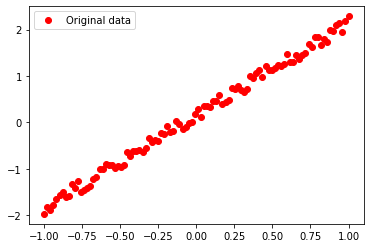

In [3]:
train_X = np.linspace(-1, 1, 100)
train_Y = 2 * train_X + np.random.random(*train_X.shape) * 0.3

## 显示模拟数据
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()

In [6]:
## 占位符
X = tf.placeholder('float')
Y = tf.placeholder('float')

## 模型参数初始化
## tf.random_normal()函数用于从服从指定正太分布的数值中取出指定个数的值。
## 初始化成[-1，1]的随机数
## Variable：定义变量
W =tf.Variable(tf.random_normal([1]), name="weight")
b =tf.Variable(tf.zeros([1]), name="bias")

## 前向结构
## tf.multiply（）两个矩阵中对应元素各自相乘
z = tf.multiply(X, W) + b

**反向结构**

In [8]:
## reduce_mean计算张量的各个维度上的元素的平均值.
cost = tf.reduce_mean(tf.square(Y - z))
learning_rate = 0.01

## 优化
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

**训练模型**

* 建立好模型后，可以通过迭代来训练模型了。TensorFlow中的任务是通过session来进行的。
* 下面的代码中，先进行全局初始化，然后设置训练迭代的次数，启动session开始运行任务。

Epoch: 1 cost= 0.008879987 W= [1.9677233] b= [0.14989014]
Epoch: 3 cost= 0.008318932 W= [1.996789] b= [0.15987976]
Epoch: 5 cost= 0.008228485 W= [2.0066051] b= [0.15646875]
Epoch: 7 cost= 0.008219237 W= [2.0091822] b= [0.1554857]
Epoch: 9 cost= 0.008217892 W= [2.0098493] b= [0.15522976]
Epoch: 11 cost= 0.008217614 W= [2.0100224] b= [0.1551635]
Epoch: 13 cost= 0.008217547 W= [2.0100653] b= [0.15514687]
Epoch: 15 cost= 0.008217532 W= [2.0100765] b= [0.15514265]
Epoch: 17 cost= 0.008217527 W= [2.01008] b= [0.15514134]
Epoch: 19 cost= 0.008217526 W= [2.0100813] b= [0.15514095]
 Finished!
cost= 0.008217524 W= [2.0100818] b= [0.1551408]


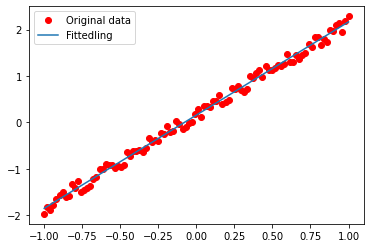

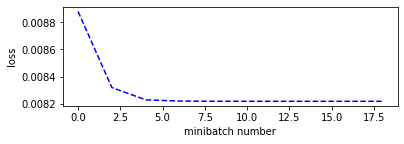

In [9]:
#初始化所有变量
init = tf.global_variables_initializer()
#定义参数
training_epochs = 20
display_step = 2

# 统计loss平均值
def moving_average(a, w=10):
    if len(a) < w: 
        return a[:]    
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in 
    enumerate(a)]

#启动session
with tf.Session() as sess:
    sess.run(init)
    plotdata={"batchsize":[],"loss":[]} #存放批次值和损失值
    #向模型输入数据
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #显示训练中的详细信息
        if epoch % display_step == 0:
            loss = sess.run(cost,feed_dict={X:train_X,Y:train_Y})
            print ("Epoch:", epoch+1,"cost=", loss,"W=",sess.run(W), 
            "b=", sess.run(b))
            if not (loss == "NA" ):
                plotdata["batchsize"].append(epoch)
                plotdata["loss"].append(loss)

    print (" Finished!")
    print ("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), 
    "W=", sess.run(W), "b=", sess.run(b))
    
    ## 显示拟合曲线
    plt.plot(train_X, train_Y, 'ro', label = 'Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fittedling')
    plt.legend()
    plt.show()

    # 显示loss曲线
    plotdata["avgloss"] = moving_average(plotdata["loss"])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata["batchsize"], plotdata["avgloss"],'b--')
    plt.xlabel('minibatch number')
    plt.ylabel('loss')
    plt.title('')
    plt.show()